# Gradient in _K_ with migration, selection

In these simulations, we explored the effects of selection in generating clines. All populations were initialized at carrying capacity (K = 1000). We performed simulations under 3 migration rates: 0, 0.01, 0.05. Simulations included 10 selection coefficients: 0; 0.001; 0.0025; 0.005; 0.0075; 0.01; 0.025; 0.05; 0.1; 0.2 The parameter combinations were as follows (all varied parameters crossed factorially, total simulations = 30): 

* Number of simulations: 1000
* Number of generations: 500
* Max Creation probability: NA
* Bottleneck proportion: NA
* pA and pB: 0.5 and 0.5
* Migration rate: [0; 0.01; 0.05]
* Maximum _K_ (rural): 1000
* Minimum _K_ (urban): 1000
* Maximum selection coefficient: 0; 0.001; 0.0025; 0.005; 0.0075; 0.01; 0.025; 0.05; 0.1; 0.2

In [2]:
library(plyr)
library(ggplot2)
library(data.table)
library(Rmisc)
library(dplyr)

Loading required package: lattice
------------------------------------------------------------------------------
data.table + dplyr code now lives in dtplyr.
Please library(dtplyr)!
------------------------------------------------------------------------------

Attaching package: ‘dplyr’

The following objects are masked from ‘package:data.table’:

    between, first, last

The following objects are masked from ‘package:plyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [7]:
#Working directory for datasets varying migration rate and bottleneck proportion 
setwd('~/Documents/Academia/Doctorate_PhD/Projects/SEC_Simulating.evolutionary.clines/SEC_Data/summary-datasets/allFill_Kvary_Selection')

# Dataset for mean slope and proportions by parameter combination
MeansProps <- fread('20171221_MeansProps_allFill_Selection.csv', header = T)
MeansProps$max_s = as.factor(as.character(MeansProps$max_s))
MeansProps$Mig_rate = as.factor(as.character(MeansProps$Mig_rate))
# MeansProps$prop_sigPos[MeansProps$prop_sigPos == 1.000] <- 0.0

# Dataset with output from each regression
RegSummary <- fread('20171221_RegSummary_allFill_Selection.csv')

Read 15000000 rows and 6 (of 6) columns from 0.786 GB file in 00:00:12


In [10]:
#Data subsets
MeansProps_Gen250 <- subset(MeansProps, seq == "250")
MeansProps_NoMig <- subset(MeansProps, Mig_rate == "0")
MeansProps_NoMig_Gen250 <- subset(MeansProps, seq == "250" & Mig_rate == "0")

MeansProps_NoMig_Gen250_SigOnly <- RegSummary %>%
    filter(Generation == 250 & p.value < 0.05) %>% 
    group_by(Mig_rate, max_s) %>%
    summarize(mean_SigSlope = mean(estimate), 
              sd_SigSlope = sd(estimate),
              n = length(estimate),
              se_SigSlope = sd_SigSlope / sqrt(n), 
              ci_SigSlope = 1.96 * se_SigSlope)

In [12]:
MeansProps_NoMig_Gen250_SigOnly

Mig_rate,max_s,mean_SigSlope,sd_SigSlope,n,se_SigSlope,ci_SigSlope
0.00,0.0000,0.0010131853,0.0076361951,45,1.138337e-03,2.231140e-03
0.00,0.0010,0.0076550693,0.0021305440,78,2.412366e-04,4.728237e-04
0.00,0.0025,0.0080588523,0.0018655960,197,1.329182e-04,2.605197e-04
0.00,0.0050,0.0098597011,0.0021706358,636,8.607131e-05,1.686998e-04
0.00,0.0075,0.0118805664,0.0026794783,944,8.720959e-05,1.709308e-04
0.00,0.0100,0.0150681843,0.0027631433,998,8.746577e-05,1.714329e-04
0.00,0.0250,0.0274521242,0.0015202230,1000,4.807367e-05,9.422440e-05
0.00,0.0500,0.0337655977,0.0006305281,1000,1.993905e-05,3.908054e-05
0.00,0.1000,0.0362832443,0.0002531999,1000,8.006883e-06,1.569349e-05
0.00,0.2000,0.0371281495,0.0001014414,1000,3.207860e-06,6.287406e-06


In [13]:
#Themes used for plotting
ng1=theme(aspect.ratio=0.7,panel.background = element_blank(), 
          panel.grid.major = element_blank(), 
          panel.grid.minor = element_blank(),
          panel.border=element_blank(),
          axis.line.x = element_line(color="black",size=1), 
          axis.line.y = element_line(color="black",size=1),
          axis.ticks=element_line(color="black"), 
          axis.text=element_text(color="black",size=15), 
          axis.title=element_text(color="black",size=1), 
          axis.title.y=element_text(vjust=2,face="bold",size=15),
          axis.title.x=element_text(vjust=0.1,face="bold",size=15),
          axis.text.x=element_text(size=13),
          axis.text.y=element_text(size=13),
          legend.position = "right", legend.direction="vertical", 
          legend.text=element_text(size=11), legend.key = element_rect(fill = "white"), 
          legend.title = element_text(size=13,face="bold"),legend.key.size = unit(0.5, "cm"))

ng1.45=theme(aspect.ratio=0.7,panel.background = element_blank(), 
          panel.grid.major = element_blank(), 
          panel.grid.minor = element_blank(),
          panel.border=element_blank(),
          axis.line.x = element_line(color="black",size=1), 
          axis.line.y = element_line(color="black",size=1),
          axis.ticks=element_line(color="black"), 
          axis.text=element_text(color="black",size=15), 
          axis.title=element_text(color="black",size=1), 
          axis.title.y=element_text(vjust=2,face="bold",size=15),
          axis.title.x=element_text(vjust=0.1,face="bold",size=15),
          axis.text.x=element_text(size=13,angle=45,hjust=1),
          axis.text.y=element_text(size=13),
          legend.position = "right", legend.direction="vertical", 
          legend.text=element_text(size=11), legend.key = element_rect(fill = "white"), 
          legend.title = element_text(size=13,face="bold"),legend.key.size = unit(0.5, "cm"))

# Mean slope by selection and migration rate

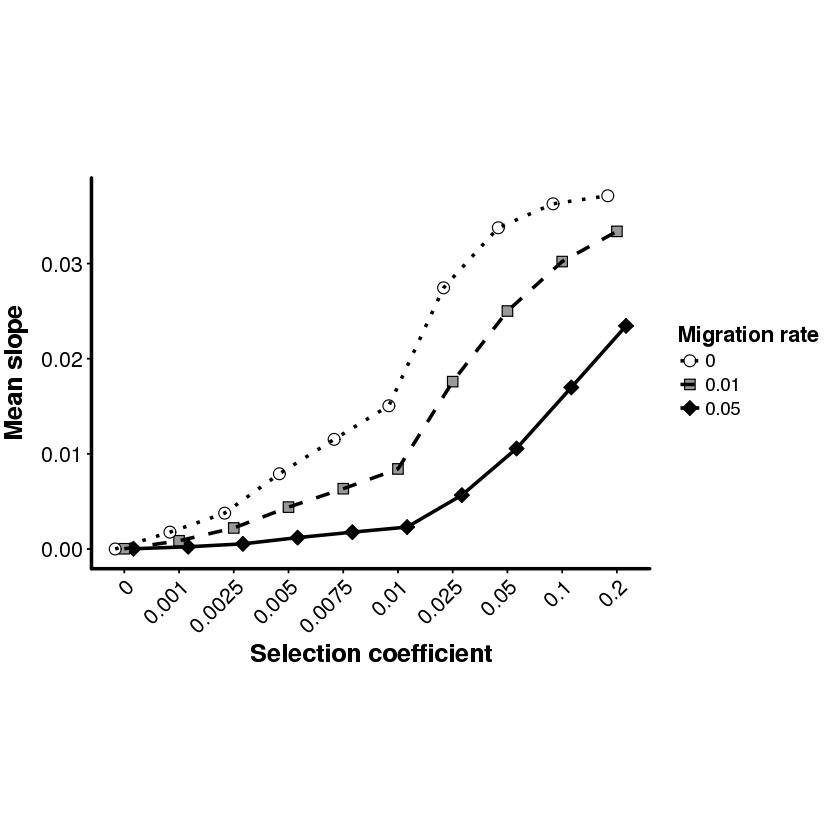

In [8]:
MeanSlope_Sel_Mig <- ggplot(MeansProps_Gen250, aes(x = max_s, y = mean, group = factor(Mig_rate))) + 
    geom_errorbar(aes(ymin = mean - ci_mean, ymax = mean + ci_mean), width=0.15, size=0.7,
    position = position_dodge(width = 0.5)) +
    geom_point(size = 3, aes(fill = factor(Mig_rate), shape = factor(Mig_rate)), position = position_dodge(width = 0.5)) + 
    geom_line(size = 1, aes(linetype = factor(Mig_rate)), position = position_dodge(width = 0.5)) +
    scale_shape_manual(labels = c("0", "0.01", "0.05"), values = c(21, 22, 23)) +
    scale_fill_manual(labels = c("0", "0.01", "0.05"), values = c("white", "grey60", "black")) +
    scale_linetype_manual(labels = c("0", "0.01", "0.05"), values = c("dotted", "dashed", "solid")) +  
    ylab("Mean slope") + xlab("Selection coefficient") + 
    labs(fill = "Migration rate", shape = "Migration rate", linetype = "Migration rate") + ng1.45
MeanSlope_Sel_Mig

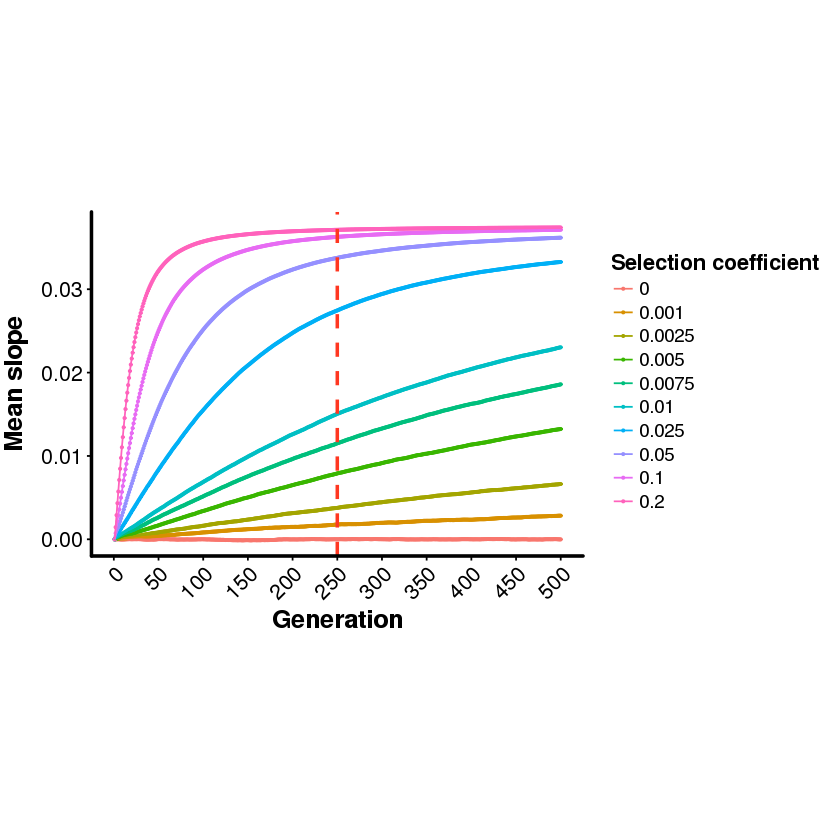

In [13]:
MeanSlope_byGen <- ggplot(MeansProps_NoMig, aes(x = seq, y = mean, group = max_s, color = max_s)) + 
    ylab("Mean slope") + xlab("Generation") + geom_point(size = 0.5, aes(color = max_s)) +
    geom_line(size = 0.5, aes(color = max_s)) + 
    coord_cartesian(xlim = c(0, 500)) + scale_x_continuous(breaks = seq(from = 0, to = 500, by = 50)) + 
    labs(color = "Selection coefficient") + 
    geom_vline(xintercept = 250, size = 1, colour = "#FF3721", linetype = "dashed") + ng1.45
MeanSlope_byGen

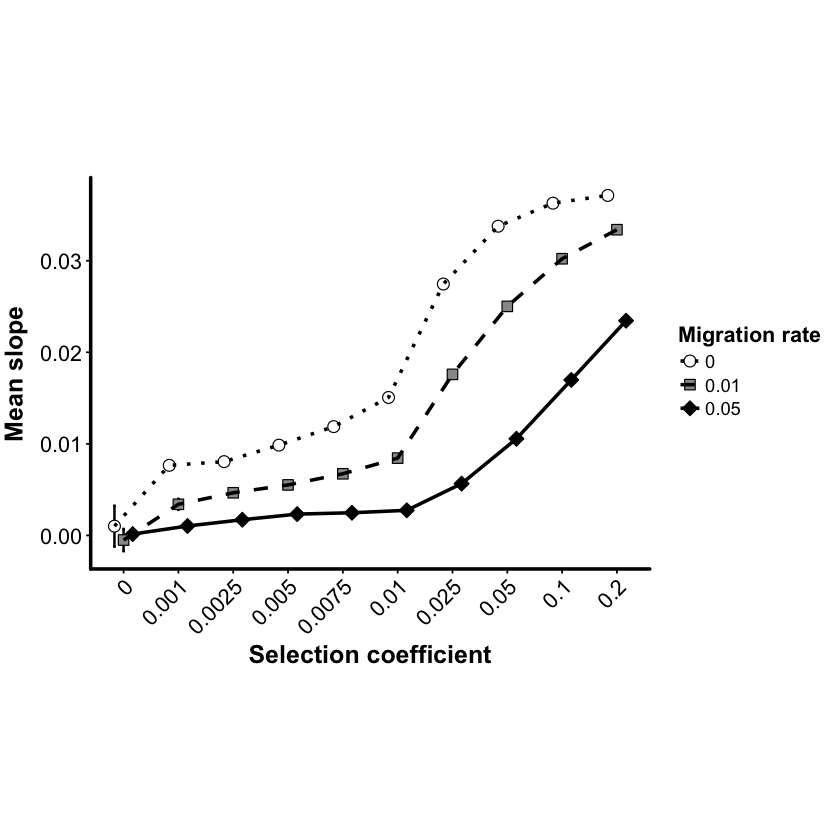

In [16]:
MeanSlope_Sel_Mig_SigOnly <- ggplot(MeansProps_NoMig_Gen250_SigOnly, aes(x = factor(max_s), y = mean_SigSlope, group = factor(Mig_rate))) + 
    geom_errorbar(aes(ymin = mean_SigSlope - ci_SigSlope, ymax = mean_SigSlope + ci_SigSlope), width=0.15, size=0.7,
    position = position_dodge(width = 0.5)) +
    geom_point(size = 3, aes(fill = factor(Mig_rate), shape = factor(Mig_rate)), position = position_dodge(width = 0.5)) + 
    geom_line(size = 1, aes(linetype = factor(Mig_rate)), position = position_dodge(width = 0.5)) +
    scale_shape_manual(labels = c("0", "0.01", "0.05"), values = c(21, 22, 23)) +
    scale_fill_manual(labels = c("0", "0.01", "0.05"), values = c("white", "grey60", "black")) +
    scale_linetype_manual(labels = c("0", "0.01", "0.05"), values = c("dotted", "dashed", "solid")) +  
    ylab("Mean slope") + xlab("Selection coefficient") + 
    labs(fill = "Migration rate", shape = "Migration rate", linetype = "Migration rate") + ng1.45
MeanSlope_Sel_Mig_SigOnly

## Effects of selection, migration on proportion of negative and positive clines

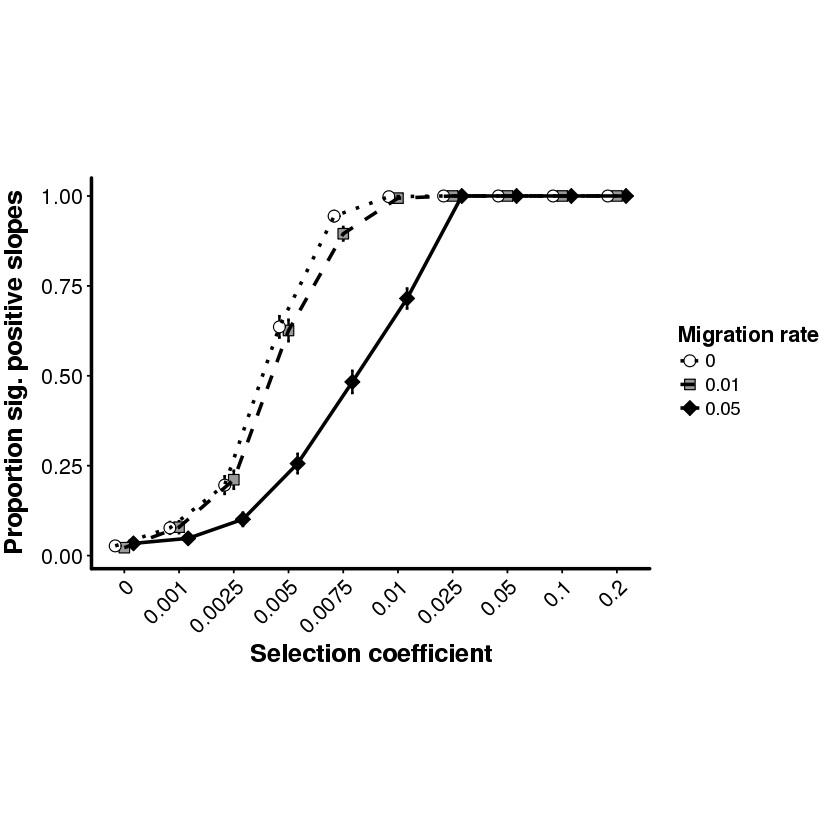

In [18]:
PropSigPos_Sel_Mig <- ggplot(MeansProps_Gen250, aes(x = max_s, y = prop_sigPos, group = factor(Mig_rate))) + 
    geom_errorbar(aes(ymin = prop_sigPos - ci_sigPos, ymax = prop_sigPos + ci_sigPos), width=0.15, size=0.7,
    position = position_dodge(width = 0.5)) +
    geom_point(size = 3, aes(fill = factor(Mig_rate), shape = factor(Mig_rate)), position = position_dodge(width = 0.5)) + 
    geom_line(size = 1, aes(linetype = factor(Mig_rate)), position = position_dodge(width = 0.5)) +
    scale_shape_manual(labels = c("0", "0.01", "0.05"), values = c(21, 22, 23)) +
    scale_fill_manual(labels = c("0", "0.01", "0.05"), values = c("white", "grey60", "black")) +
    scale_linetype_manual(labels = c("0", "0.01", "0.05"), values = c("dotted", "dashed", "solid")) +  
    ylab("Proportion sig. positive slopes") + xlab("Selection coefficient") + 
    labs(fill = "Migration rate", shape = "Migration rate", linetype = "Migration rate") + ng1.45
PropSigPos_Sel_Mig

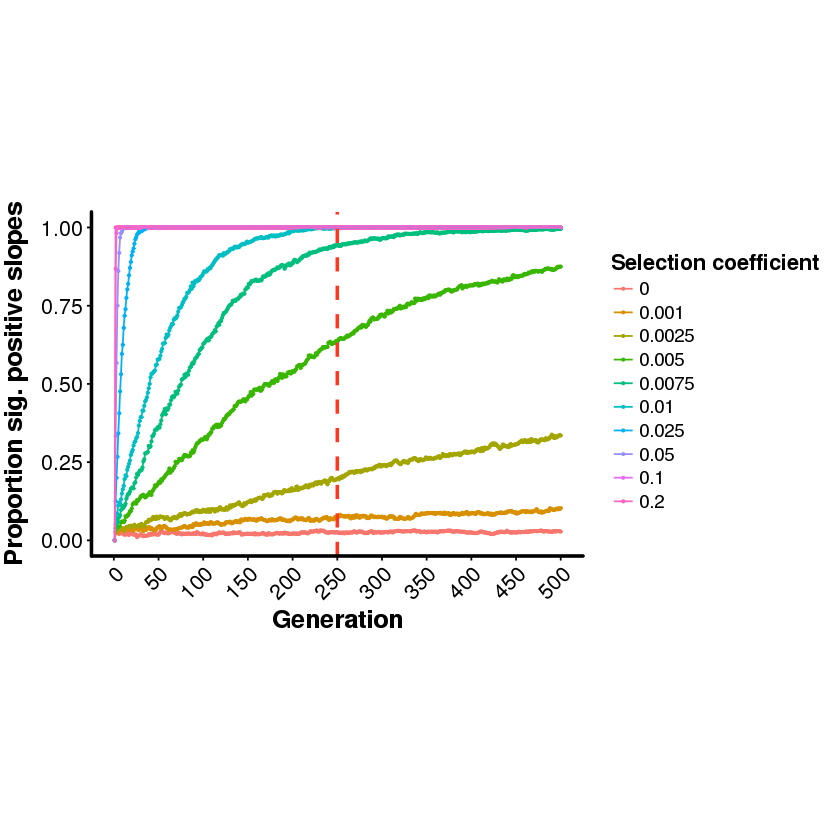

In [20]:
PropSigPos_byGen <- ggplot(MeansProps_NoMig, aes(x = seq, y = prop_sigPos, group = max_s, color = max_s)) + 
    ylab("Proportion sig. positive slopes") + xlab("Generation") + geom_point(size = 0.5, aes(color = max_s)) +
    geom_line(size = 0.5, aes(color = max_s)) + 
    coord_cartesian(xlim = c(0, 500)) + scale_x_continuous(breaks = seq(from = 0, to = 500, by = 50)) + 
    labs(color = "Selection coefficient") + 
    geom_vline(xintercept = 250, size = 1, colour = "#FF3721", linetype = "dashed") + ng1.45
PropSigPos_byGen 

In [21]:
#Extra columns that will be used to create melting dataset for plotting proportion of positive and negative slopes
MeansProps_melt <- dplyr::select(MeansProps_NoMig_Gen250, max_s, prop_sigPos, ci_sigPos, prop_sigNeg,
  ci_sigNeg)

#Melt dataframe
dm1 <- melt(MeansProps_melt[,c("max_s", "prop_sigPos", "ci_sigPos")], 
            id=c("max_s", "ci_sigPos"))
dm2 <- melt(MeansProps_melt[,c("max_s", "prop_sigNeg", "ci_sigNeg")], 
            id=c("max_s", "ci_sigNeg"))

#Rename columns
setnames(dm1, old = c("ci_sigPos"), new = "ci")
setnames(dm2, old = c("ci_sigNeg"), new = "ci")

#Merge melted dataframes
MeansProps_melt <- rbind(dm1, dm2)
MeansProps_melt

max_s,ci,variable,value
0,0.010046028,prop_sigPos,0.027
0.001,0.016523509,prop_sigPos,0.077
0.0025,0.024604363,prop_sigPos,0.196
0.005,0.029821901,prop_sigPos,0.636
0.0075,0.014250696,prop_sigPos,0.944
0.01,0.002769085,prop_sigPos,0.998
0.025,0.000000000,prop_sigPos,1.000
0.05,0.000000000,prop_sigPos,1.000
0.1,0.000000000,prop_sigPos,1.000
0.2,0.000000000,prop_sigPos,1.000


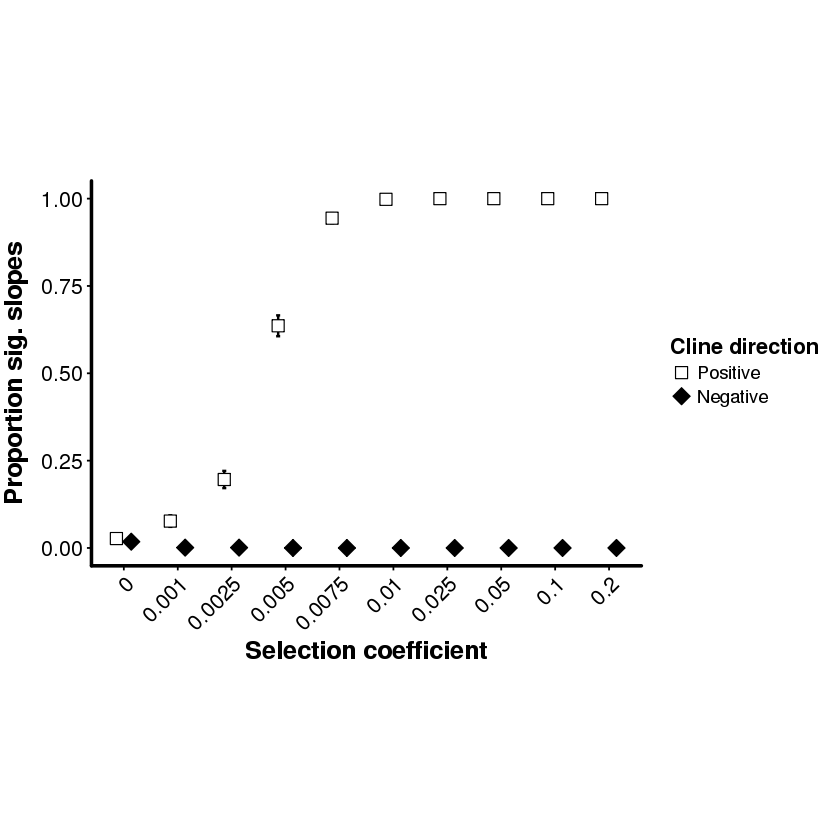

In [22]:
#Plot proportion of significant slopes by migration rate
PropSig_max_s <- ggplot(MeansProps_melt, aes(x = max_s, y = value, 
    shape = variable, fill = variable)) + 
    geom_errorbar(aes(ymin = value - ci, ymax = value + ci), width=0.15, size = 0.7, position = position_dodge(width = 0.55)) +
    ylab("Proportion sig. slopes") + xlab("Selection coefficient") + 
    geom_point(size = 3.5, color = "black", position = position_dodge(width = 0.55)) +
    scale_shape_manual(labels = c("Positive", "Negative"),values=c(22, 23))+
    scale_fill_manual(labels = c("Positive", "Negative"),values=c("white", "black")) +
    labs(shape = 'Cline direction', fill = 'Cline direction') + ng1.45
PropSig_max_s

In [ ]:
path = "/scratch/research/projects/trifolium/SEC_Simulation.Evolutionary.Clines/SEC_Sync/SEC_Figures/Drift.Migration/Mig_Bot_Vary"

# ggsave("PropSig_Mig.pdf", plot = PropSig_Mig, device = "pdf", width = 6.0, height = 6.0, path = path, dpi = 600)
# ggsave("HistSlopes_pA_NoMig.pdf", plot = HistSlopes_pA_NoMig, device = "pdf", width = 6.0, height = 6.0, path = path, dpi = 600)
# ggsave("HistSlopes_HCN_NoMig.pdf", plot = HistSlopes_Cyan_NoMig, device = "pdf", width = 6.0, height = 6.0, path = path, dpi = 600)
# ggsave("MeanSlope_Mig_Type.pdf", plot = MeanSlope_Mig_Type, device = "pdf", width = 6.0, height = 6.0, path = path, dpi = 600)

ggsave("MeanSlope_Mig_Type.pdf", plot = MeanSlope_Mig_Type, device = "pdf", width = 6.0, height = 6.0, path = path, dpi = 600)
ggsave("PropSig_Mig.pdf", plot = PropSig_Mig, device = "pdf", width = 6.0, height = 6.0, path = path, dpi = 600)
